In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import datetime

dataset_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(dataset_url, compression="zip")
df.shape

(420551, 15)

## 1. Pré-processamento dos dados

O nosso conjunto de dados possui 420.551 registros e 15 colunas. As colunas são:

- `Date Time`: Data e hora da medição
- `p (mbar)`: A unidade de pressão derivada do SI pascal usada para quantificar a pressão interna. Os relatórios meteorológicos normalmente indicam a pressão atmosférica em milibares.
- `T (degC)`: Temperatura em graus Celsius
- `Tpot (K)`: Temperatura potencial em K
- `Tdew (degC)`: Temperatura em Celsius em relação à umidade. O Ponto de Orvalho é uma medida da quantidade absoluta de água no ar, o DP é a temperatura na qual o ar não consegue reter toda a umidade e a água se condensa.
- `rh (%)`: A Umidade Relativa é uma medida de quão saturado o ar está com vapor de água, o% UR determina a quantidade de água contida nos objetos da coleção.
- `VPmax (mbar)`: Pressão de vapor de saturação
- `VPact (mbar)`: Pressão de vapor
- `VPdef (mbar)`: Pressão de vapor deficit
- `sh (g/kg)`: Umidade específica em g/kg
- `H2OC (mmol/mol)`: Concentração de vapor de água em mmol/mol
- `rho (g/m**3)`: Densidade do ar em g/m**3
- `wv (m/s)`: Velocidade do vento em m/s
- `max. wv (m/s)`: Velocidade máxima do vento em m/s
- `wd (deg)`: Direção do vento em graus

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


A coluna `Date Time` é do tipo `object` e as demais são do tipo `float64`. Começamos dando uma olhada nas primeiras e últimas linhas do conjunto de dados.

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


O tipo das colunas também pode ser verificado com o método `dtypes`. O código 'O' representa o tipo `object`, abaixo temos a tabela de correspondência dos tipos de dados extraída da [documentação do numpy](https://numpy.org/doc/stable/reference/generated/numpy.dtype.kind.html).

<center>

| Caractere | Tipo de Dados |
|-----------|---------------|
| b         | boolean       |
| i         | signed integer|
| u         | unsigned integer|
| f         | floating-point|
| c         | complex floating-point|
| m         | timedelta     |
| M         | datetime      |
| O         | object        |
| S         | (byte-)string |
| U         | Unicode       |
| V         | void          |


</center>


In [5]:
df["Date Time"].dtypes  # 'O' significa que é um objeto

dtype('O')

Verificamos que a coluna `Date Time` não foi reconhecida como uma data, então vamos convertê-la para o tipo `datetime` com o método `pd.to_datetime`. Para converter no formato adequado, usamos a referência [strftime.org](https://strftime.org/). Há vários formatos de data e hora, normalmente usamos `%Y` para o representar o ano com 4 dígitos, `%m` para o mês, `%d` para o dia, `%H` para a hora em formato 24 horas, `%M` para os minutos e `%S` para os segundos. 

Exemplos:

- `2024-03-01 23:59:59` é representado por `%Y-%m-%d %H:%M:%S`
- `2024-03-01` é representado por `%Y-%m-%d`
- `23:59:59` é representado por `%H:%M:%S`

Ao visualizar as primeiras e últimas linhas do conjunto de dados, percebemos que a coluna `Date Time` está no formato `DD.MM.YYYY HH:MM:SS`.

In [6]:
df["Date Time"].str.len().value_counts()  # todos os valores tem 19 caracteres

19    420551
Name: Date Time, dtype: int64

In [7]:
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df.dtypes  # datetime64[ns]

Date Time          datetime64[ns]
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
dtype: object

Vemos que a coluna `Date Time` foi convertida para o tipo `datetime64[ns]`. Nós esperamos que os valores do dia estejam entre 1 e 31, pois as medições foram feitas diariamente, logo, o histograma dos dias deve ser aproximadamente uniforme com um pequeno desvio devido a meses com 30 ou 31 dias.

<Axes: ylabel='Frequency'>

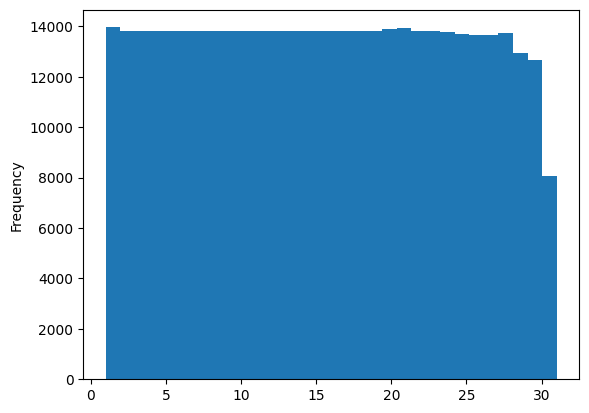

In [8]:
df["Date Time"].dt.day.plot(kind="hist", bins=31)

Verificamos a presença de valores nulos com o método `isnull().sum()`. Não há valores nulos no conjunto de dados.

In [9]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Em seguida, verificamos a presença de valores duplicados com o método `duplicated().sum()`. Há 327 valores duplicados no conjunto de dados.

In [10]:
df.duplicated().sum()  # 327 valores duplicados

327

Notamos que há 327 valores duplicados no conjunto de dados, provavelmente devido a medições feitas no mesmo instante de tempo. Vamos remover esses valores duplicados com o método `drop_duplicates`.

In [11]:
df = df.drop_duplicates()
df.shape  # (420224, 15)

(420224, 15)

As distribuição dos dias é aproximadamente uniforme como esperado. Em seguida, verificamos se está faltando medições, os dados são coletados a cada 10 minutos, então esperamos que a diferença entre cada coleta seja de 10 minutos. 

In [12]:
diff_time = df["Date Time"].diff().value_counts().reset_index()
diff_time.columns = ["diff", "count"]
diff_time

,diff,count
0,0 days 00:10:00,420218
1,0 days 00:20:00,2
2,0 days 00:30:00,1
3,0 days 16:00:00,1
4,3 days 02:20:00,1


Podemos notar que houveram momentos em que a diferença entre as medições foi maior que 10 minutos, provavelmente devido a problemas na coleta de dados. 

In [13]:
total_missings = (diff_time["diff"] / pd.Timedelta(minutes=10) - 1) * diff_time["count"]
total_missings.sum()

544.0

Há 544 registros faltantes no conjunto de dados. Vamos definir a coluna `Date Time` como índice do conjunto de dados com o método `set_index` e preencher os valores faltantes usando interpolação com o `interpolate`.

In [14]:
df = df.set_index("Date Time").sort_index().asfreq("10min")
df.isnull().sum()

p (mbar)           544
T (degC)           544
Tpot (K)           544
Tdew (degC)        544
rh (%)             544
VPmax (mbar)       544
VPact (mbar)       544
VPdef (mbar)       544
sh (g/kg)          544
H2OC (mmol/mol)    544
rho (g/m**3)       544
wv (m/s)           544
max. wv (m/s)      544
wd (deg)           544
dtype: int64

In [15]:
df = df.interpolate(method="time")
df = df.reset_index()

### 1.1 Identificação de Outliers



In [16]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,989.224234,9.44496,283.486593,4.957589,76.035158,13.568662,9.534038,4.034537,6.022509,9.640390,1216.097078,1.700839,3.055135,174.798695
std,8.362459,8.41612,8.497030,6.727829,16.452806,7.729903,4.181610,4.888545,2.654507,4.232797,39.943835,65.429775,68.999017,86.651464
min,913.600000,-23.01000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.210000,3.37000,277.440000,0.240000,65.270000,7.780000,6.220000,0.870000,3.920000,6.290000,1187.570000,0.990000,1.760000,125.200000
50%,989.590000,9.42000,283.470000,5.230000,79.300000,11.820000,8.870000,2.180000,5.600000,8.970000,1213.860000,1.760000,2.960000,198.200000
75%,994.750000,15.46000,289.510000,10.060000,89.400000,17.590000,12.350000,5.280000,7.800000,12.480000,1242.740000,2.850000,4.730000,234.200000
max,1015.350000,37.28000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Notamos que não há valores nulos no conjunto de dados e que há variás variáveis com média e a mediana próximas, o que pode indicar que as distribuições são provavelmente aproxidamente simétricas, na próxima seção vamos verificar isso. Além disso, podemos perceber que as variáveis `wv (m/s)` e `max. wv (m/s)` contém valores extremamente baixos como -9999, primeiro vamos verificar os registros que contém esses valores. Todos os registros aconteceram no dia 13/07/2015 entre 09:00 e 12:10.

In [17]:
df.loc[(df["wv (m/s)"] == -9999) | (df["max. wv (m/s)"] == -9999)]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
343349,2015-07-13 09:00:00,990.52,16.98,290.93,12.94,77.10,19.38,14.94,4.44,9.44,15.09,1182.50,6.16,-9999.0,289.6
343350,2015-07-13 09:10:00,990.49,16.85,290.80,12.78,76.90,19.22,14.78,4.44,9.34,14.92,1183.06,-9999.00,-9999.0,359.7
343351,2015-07-13 09:20:00,990.32,17.06,291.03,12.86,76.30,19.48,14.86,4.62,9.39,15.01,1181.97,-9999.00,-9999.0,359.8
343352,2015-07-13 09:30:00,990.24,17.43,291.41,12.75,74.00,19.94,14.76,5.19,9.32,14.90,1180.42,-9999.00,-9999.0,359.8
343353,2015-07-13 09:40:00,990.27,17.71,291.68,12.88,73.30,20.30,14.88,5.42,9.40,15.02,1179.26,-9999.00,-9999.0,359.8
343354,2015-07-13 09:50:00,990.28,17.76,291.73,13.03,73.80,20.36,15.03,5.33,9.49,15.17,1179.00,-9999.00,-9999.0,359.8
343355,2015-07-13 10:00:00,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.00,-9999.0,359.8
343356,2015-07-13 10:10:00,990.17,18.19,292.17,12.59,69.78,20.92,14.60,6.32,9.22,14.74,1177.32,-9999.00,-9999.0,359.8
343357,2015-07-13 10:20:00,990.07,18.31,292.30,12.97,71.00,21.08,14.97,6.11,9.46,15.12,1176.55,-9999.00,-9999.0,359.8
343358,2015-07-13 10:30:00,990.02,18.24,292.24,12.88,70.90,20.99,14.88,6.11,9.40,15.03,1176.82,-9999.00,-9999.0,359.8


Ao visualizar os registros nessa data, vemos uma queda brusca na velocidade do vento no intervalo de tempo considerado. 

<Axes: title={'center': 'Velocidade do vento em 2015-07-13'}, xlabel='Date Time'>

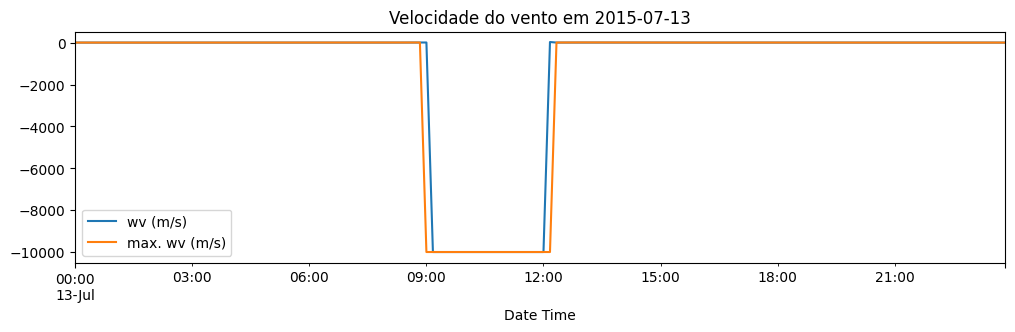

In [18]:
ax = df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13), ["Date Time", "wv (m/s)"]
].plot(x="Date Time", y="wv (m/s)", figsize=(12, 3))

ax.set_title("Velocidade do vento em 2015-07-13")
df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13),
    ["Date Time", "max. wv (m/s)"],
].plot(x="Date Time", y="max. wv (m/s)", ax=ax)

Para tratar esses valores, vamos substituir os valores -9999 por `np.nan` e em seguida vamos preencher os valores nulos com a média móvel dos 5 registros anteriores e posteriores. A média móvel é uma técnica de suavização de séries temporais que calcula a média dos valores anteriores e posteriores a um determinado ponto.

In [19]:
df = df.replace(-9999, np.nan)
df.isnull().sum()

Date Time           0
p (mbar)            0
T (degC)            0
Tpot (K)            0
Tdew (degC)         0
rh (%)              0
VPmax (mbar)        0
VPact (mbar)        0
VPdef (mbar)        0
sh (g/kg)           0
H2OC (mmol/mol)     0
rho (g/m**3)        0
wv (m/s)           18
max. wv (m/s)      20
wd (deg)            0
dtype: int64


Nessa seção, tratamos o valores extremos da variável `wv (m/s)` e `max. wv (m/s)`, em buscas na internet, não encontramos informações sobre eventos climáticos extremos no dia 13/07/2015 na cidade de Jena, Alemanha. Portanto, consideramos esses valores como erros de medição e tratamos como outliers.

In [20]:
df["wv (m/s)"].fillna(df["wv (m/s)"].rolling(24, min_periods=1).mean(), inplace=True)
df["max. wv (m/s)"].fillna(
    df["max. wv (m/s)"].rolling(24, min_periods=1).mean(), inplace=True
)

<Axes: title={'center': 'Velocidade do vento em 2015-07-13'}, xlabel='Date Time'>

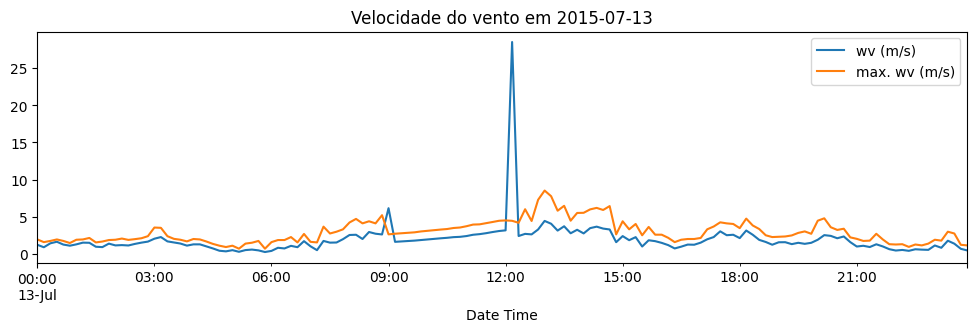

In [21]:
ax = df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13), ["Date Time", "wv (m/s)"]
].plot(x="Date Time", y="wv (m/s)", figsize=(12, 3))

ax.set_title("Velocidade do vento em 2015-07-13")
df.loc[
    df["Date Time"].dt.date == datetime.date(2015, 7, 13),
    ["Date Time", "max. wv (m/s)"],
].plot(x="Date Time", y="max. wv (m/s)", ax=ax)

#### 1.1.1 Visualizando de Outliers com gráficos de caixa

Podemos notar que apenas a variável referente a direção do vento `wd (deg)` não possui outliers. 

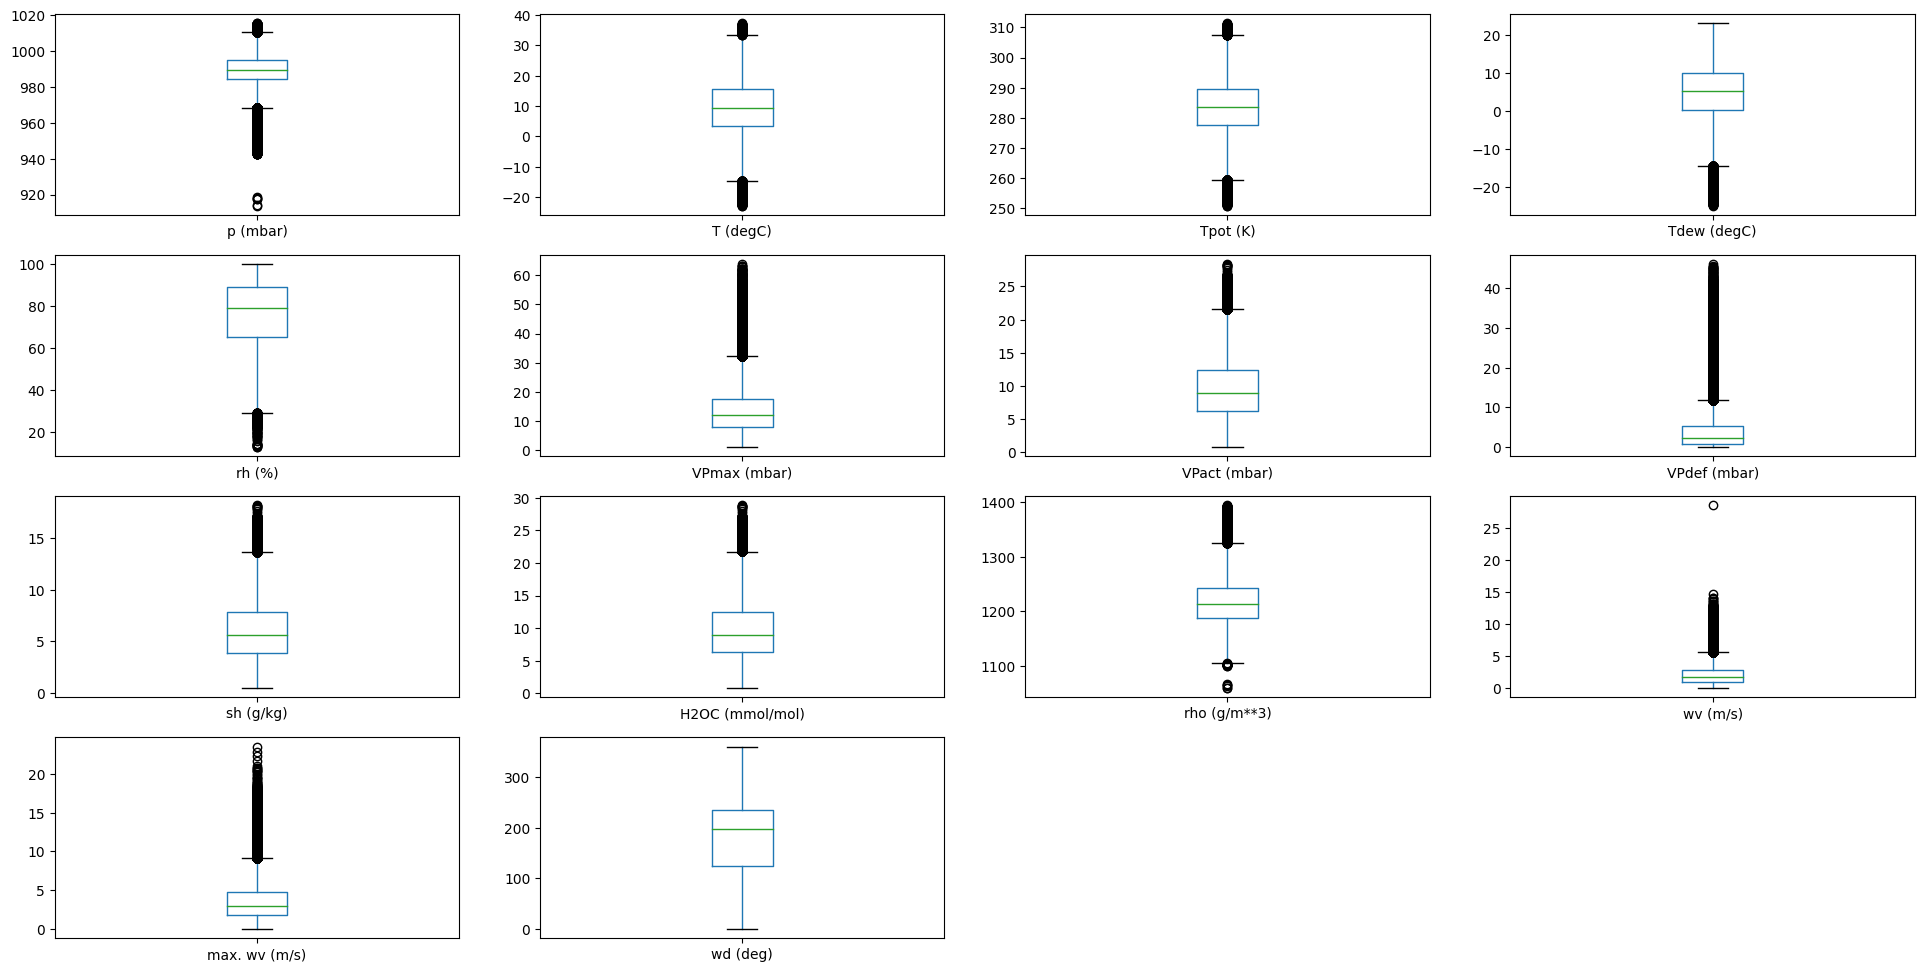

In [22]:
fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec(nrows=4, ncols=4, figure=fig)

for i, col in enumerate(df.columns[1:]):
    ax = fig.add_subplot(specs[i])
    df.boxplot(col, ax=ax)
    ax.grid(False)

plt.show()

#### 1.1.1 Visualizando Outliers com gráfico de dispersão

Nesse projeto, pretendemos prever a temperatura, então vamos usar a variável `T (degC)` como a variável dependente. Vamos visualizar a relação entre a variável alvo e as variáveis preditoras com gráficos de dispersão.

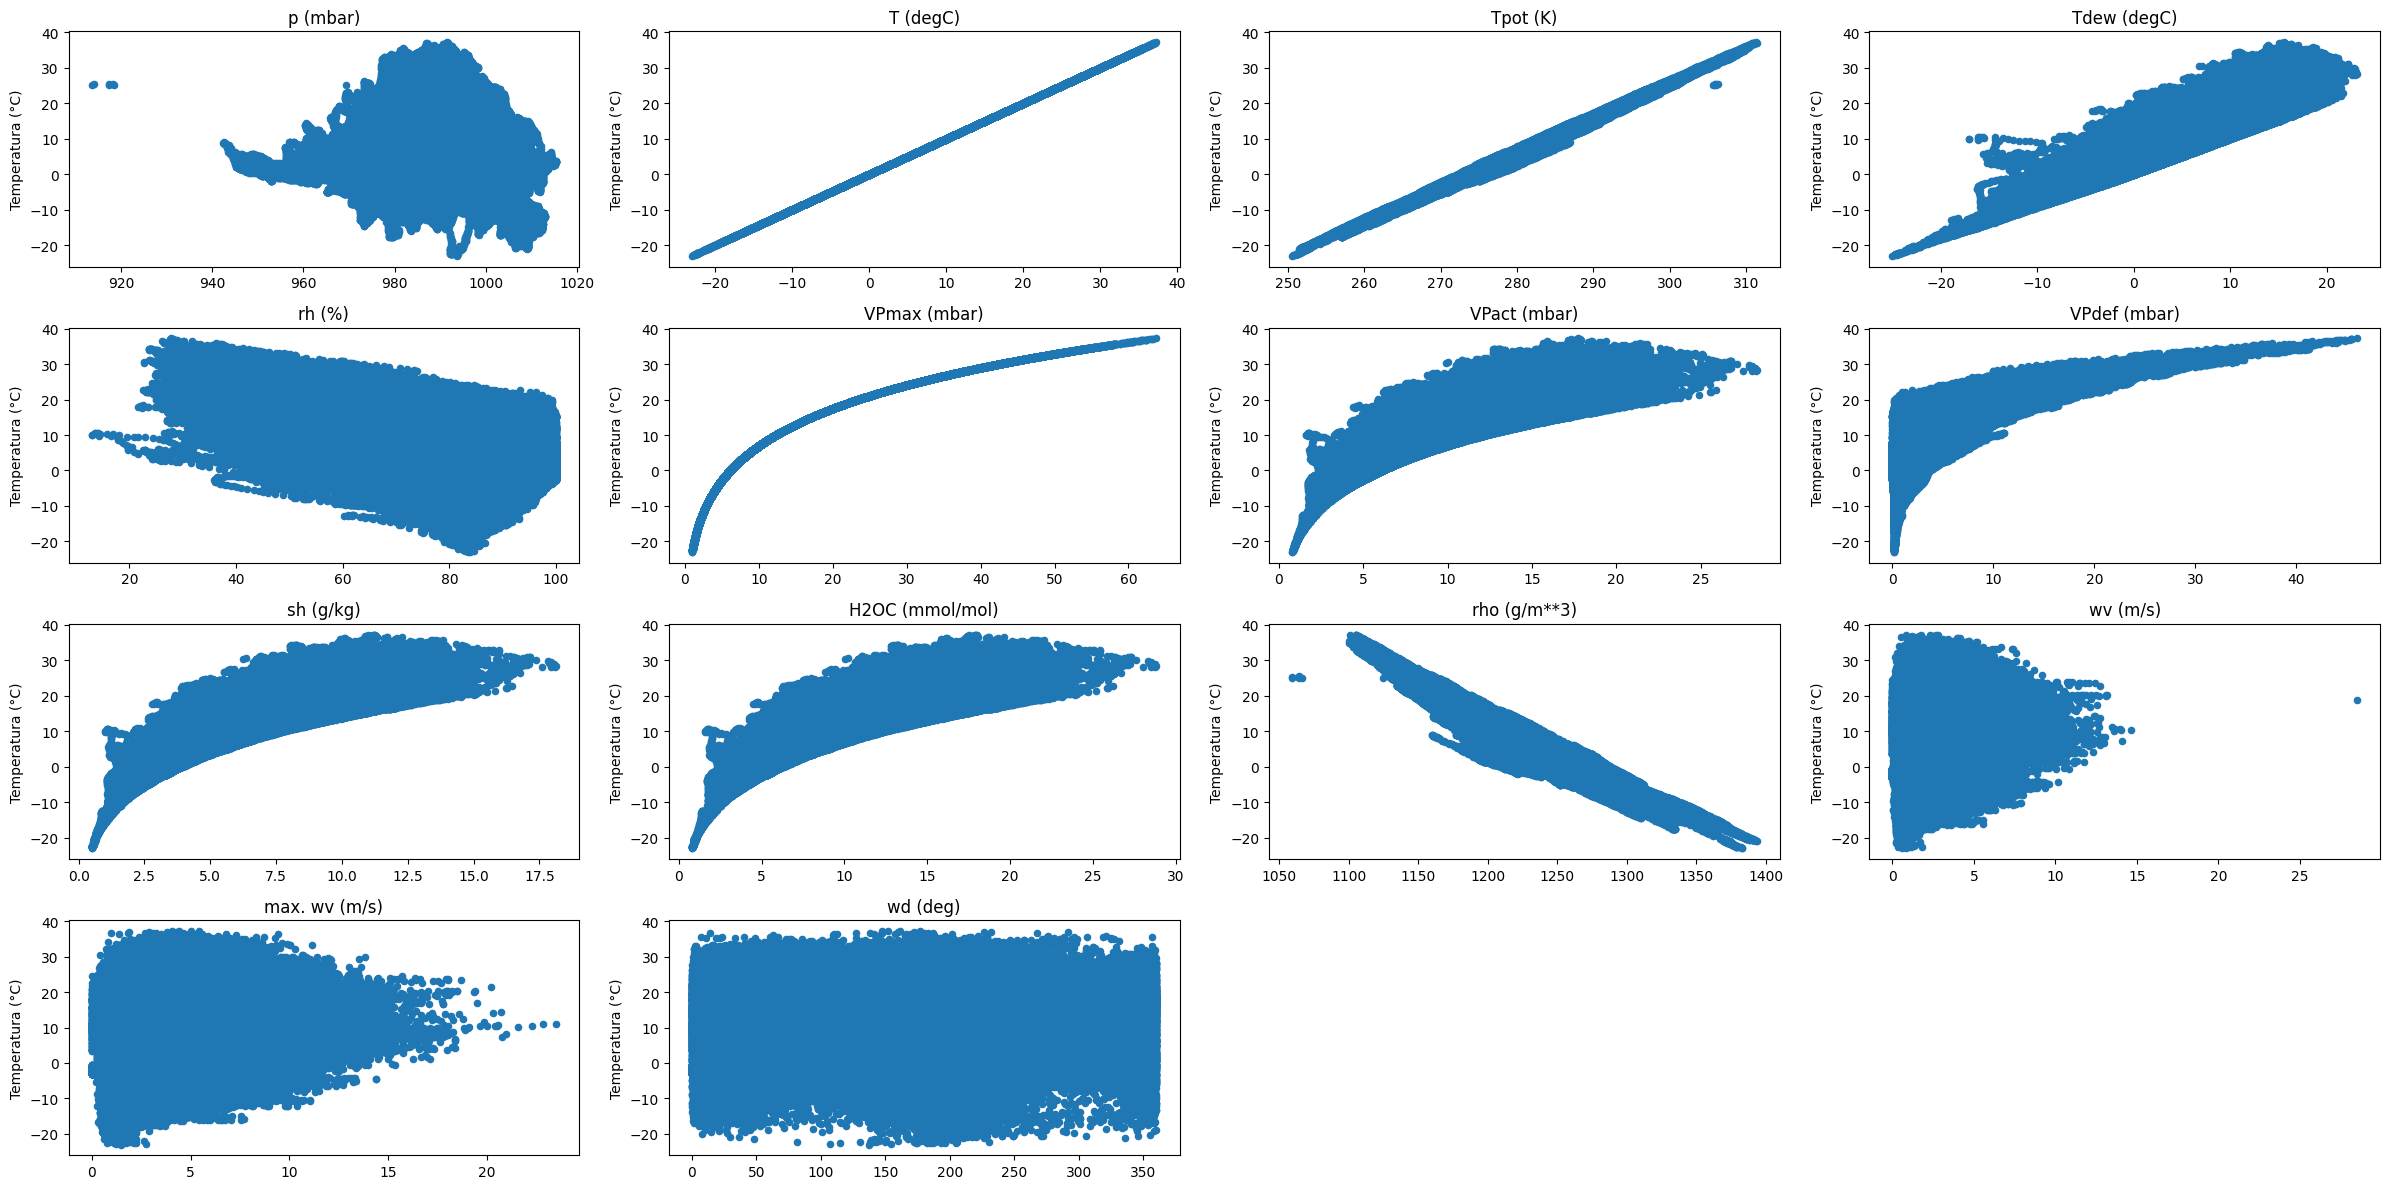

In [23]:
fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec(nrows=4, ncols=4, figure=fig)

for i, col in enumerate(df.columns[1:]):
    ax = fig.add_subplot(specs[i])
    df.plot(kind="scatter", x=col, y="T (degC)", ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("Temperatura (°C)")
    ax.set_title(col)
    ax.grid(False)

plt.tight_layout()
plt.show()

Podemos ver que em alguns gráficos, nós temos pontos que estão muito distantes dos demais, podendo serem considerados outliers. No entanto, a presença de outliers não é necessariamente um problema, pois eles podem conter informações importantes sobre o fenômeno que estamos estudando, por exemplo, a temperatura atingir 35°C no inverno pode ser outlier, mas pode ser um fenômeno real causado por uma onda de calor. Precisamos de mais informações para decidir se esses valores são outliers ou não.

## 2. Exploração dos dados

Na seção anterior, vimos que a maior parte das colunas possui a média e a mediana próximas, o que pode indicar que as distribuições são aproxidamente simétricas. Nessa seção, desejamos verificar a forma das distribuições das variáveis usando as medidas de assimetria e visualizando os histogramas.

A assimetria é uma medida de simetria da distribuição, se a assimetria é 0, a distribuição é simétrica, se a assimetria é positiva, a distribuição é assimétrica para a direita caso contrário, a distribuição é assimétrica para a esquerda.

<div align="center">

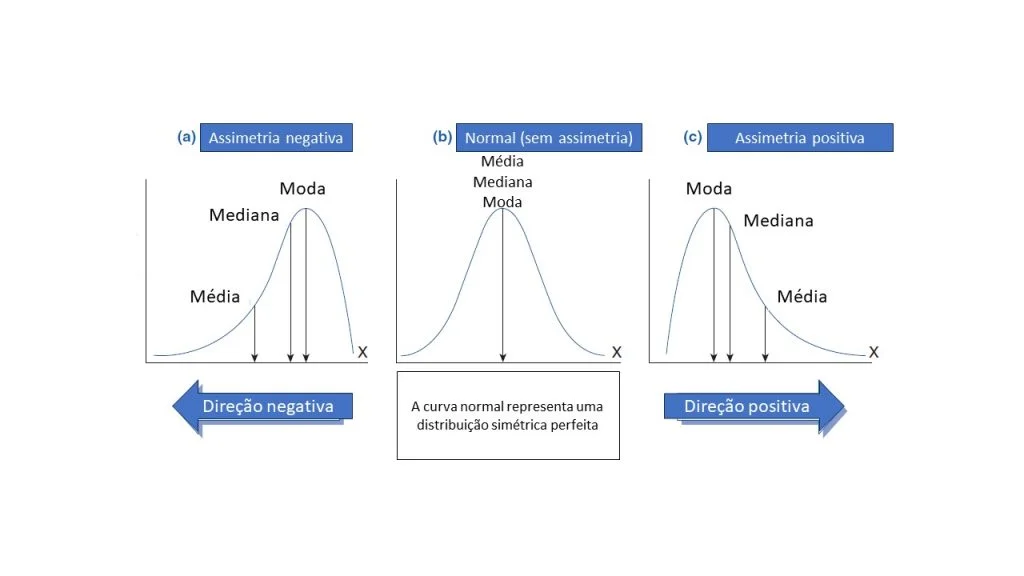
</div>

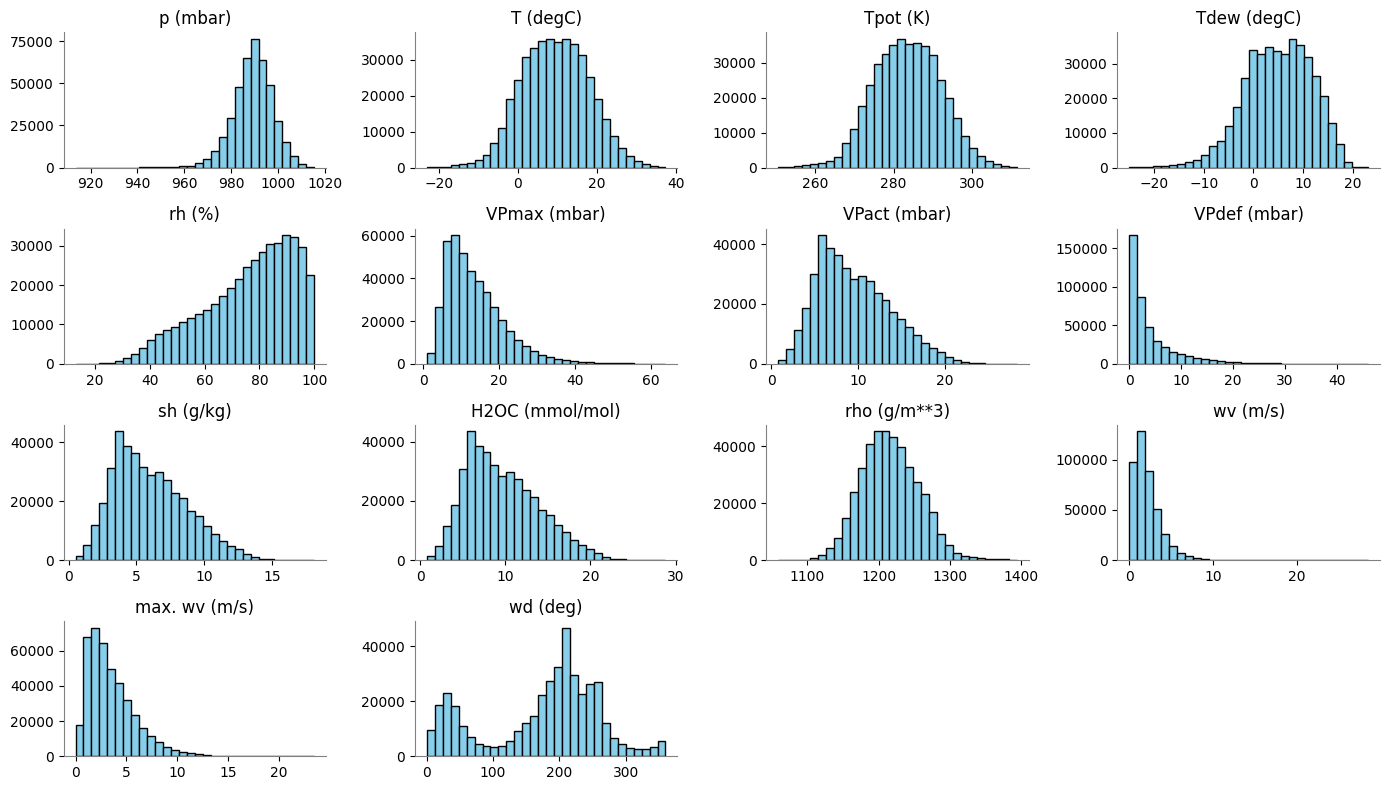

In [24]:
ax = df.drop(columns=["Date Time"]).hist(
    figsize=(14, 8),
    grid=False,
    bins=30,
    color="skyblue",
    edgecolor="black",
)

# Remove os eixos superior e direito
for sub_ax in ax.flatten():
    sub_ax.spines["top"].set_visible(False)
    sub_ax.spines["right"].set_visible(False)

    sub_ax.spines["left"].set_color("gray")
    sub_ax.spines["bottom"].set_color("gray")

plt.tight_layout()
plt.show()

In [25]:
df_desc = pd.concat(
    [
        df.drop(columns=["Date Time"]).mode().rename(index={0: "mode"}).round(0),
        df.drop(columns=["Date Time"]).agg(["mean", "median"]).round(0),
        df.drop(columns=["Date Time"]).skew().to_frame("skewness").round(0).T,
    ]
)

df_desc

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
mode,991.0,8.0,283.0,8.0,100.0,11.0,6.0,0.0,4.0,6.0,1223.0,1.0,2.0,211.0
mean,989.0,9.0,283.0,5.0,76.0,14.0,10.0,4.0,6.0,10.0,1216.0,2.0,4.0,175.0
median,990.0,9.0,283.0,5.0,79.0,12.0,9.0,2.0,6.0,9.0,1214.0,2.0,3.0,198.0
skewness,-0.0,-0.0,-0.0,-0.0,-1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-0.0


Na tabela e nos gráficos, ao calcular a assimetria com o método `skew()`, vemos que as variáveis `p (mbar)`, `T (degC)`, `Tpot (K)`, `Tdew (degC)`, `rho (g/m**3)` e `wd(deg)` são distribuições aproximadamente simétricas, pois a assimetria calculada é próxima de 0. A variável `rh (%)` é a única que possui uma assimetria a esquerda, com o coeficiente de assimetria negativo. As demais variáveis possuem o coeficiente maior que 0, indicando uma assimetria a direita.

### 2.1 Criando variáveis adicionais

Nessa seção, vamos criar variáveis adicionais que podem ser úteis para a previsão da temperatura. Vamos criar as seguintes variáveis a partir da coluna `Date Time`:

- `hour`
- `month`
- `day_of_month`
- `day_of_year`
- `season`

A estação do ano é uma variável categórica criada de acordo com a estação do ano em que a data se encontra. 

- Spring: 20 de março - 21 de junho.
- Summer: 21 de junho - 23 de setembro
- Autumn: 23 de setembro - 21 de dezembro
- Winter: 21 de dezembro - 20 de março

In [26]:
df["hour"] = df["Date Time"].dt.hour
df["day_of_year"] = df["Date Time"].dt.dayofyear
df["day_of_month"] = df["Date Time"].dt.day
df["month"] = df["Date Time"].dt.month

df["season"] = pd.cut(
    df["Date Time"].dt.dayofyear,
    [0, 78, 171, 265, 354, 366],
    labels=["Winter", "Spring", "Summer", "Autumn", "Winter"],
    ordered=False,
)

df["season"] = df["season"].cat.reorder_categories(
    ["Spring", "Summer", "Autumn", "Winter"], ordered=True
)

In [27]:
df.sample(5)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),hour,day_of_year,day_of_month,month,season
398331,2016-07-29 04:40:00,987.64,15.77,289.96,14.91,94.6,17.94,16.98,0.97,10.76,17.19,1183.05,1.31,2.00,202.30,4,211,29,7,Summer
135602,2011-07-31 16:30:00,988.87,14.49,288.57,11.88,84.3,16.53,13.93,2.59,8.81,14.09,1191.20,1.55,2.80,9.85,16,212,31,7,Summer
37621,2009-09-19 06:20:00,991.11,8.29,282.17,7.77,96.5,10.95,10.57,0.38,6.66,10.66,1221.79,0.02,0.25,132.50,6,262,19,9,Summer
113627,2011-03-01 02:00:00,1002.64,-0.65,272.30,-2.10,89.9,5.82,5.23,0.59,3.25,5.22,1279.20,0.34,0.64,18.85,2,60,1,3,Winter
60758,2010-02-26 22:30:00,973.38,4.39,279.70,-0.25,71.7,8.36,6.00,2.37,3.84,6.16,1218.87,2.12,3.40,216.50,22,57,26,2,Winter


Como a coleta de dado é feita a cada 10 minutos, a quantidade de registros para cada estação do ano deve ser aproximadamente a mesma.

<Axes: >

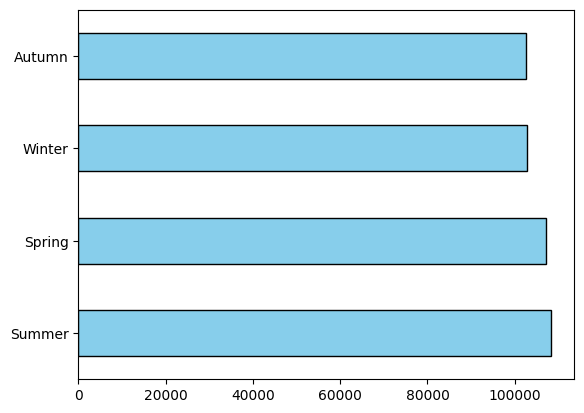

In [28]:
df["season"].value_counts().plot(kind="barh", color="skyblue", edgecolor="black")

Depois de criar as variáveis adicionais, vamos verificar a relação entre a temperatura e as variáveis criadas.

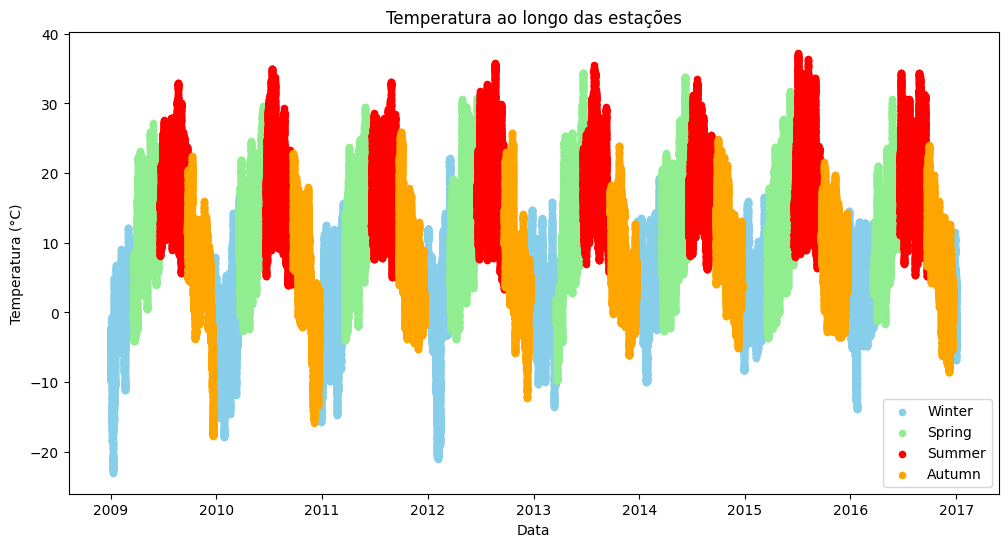

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = {
    "Winter": "skyblue",
    "Spring": "lightgreen",
    "Summer": "red",
    "Autumn": "orange",
}

for season, color in colors.items():
    df.loc[df["season"] == season].plot(
        kind="scatter", x="Date Time", y="T (degC)", color=color, ax=ax
    )

ax.set_title("Temperatura ao longo das estações")
ax.set_xlabel("Data")
ax.set_ylabel("Temperatura (°C)")
ax.legend(colors.keys())
plt.show()

A temperatura começa baixa no inverno, aumenta na primavera, atinge o pico no verão e diminui no outono durante todo o período de coleta de dados. Em seguida, analisamos a relação entre a temperatura e a hora do dia.

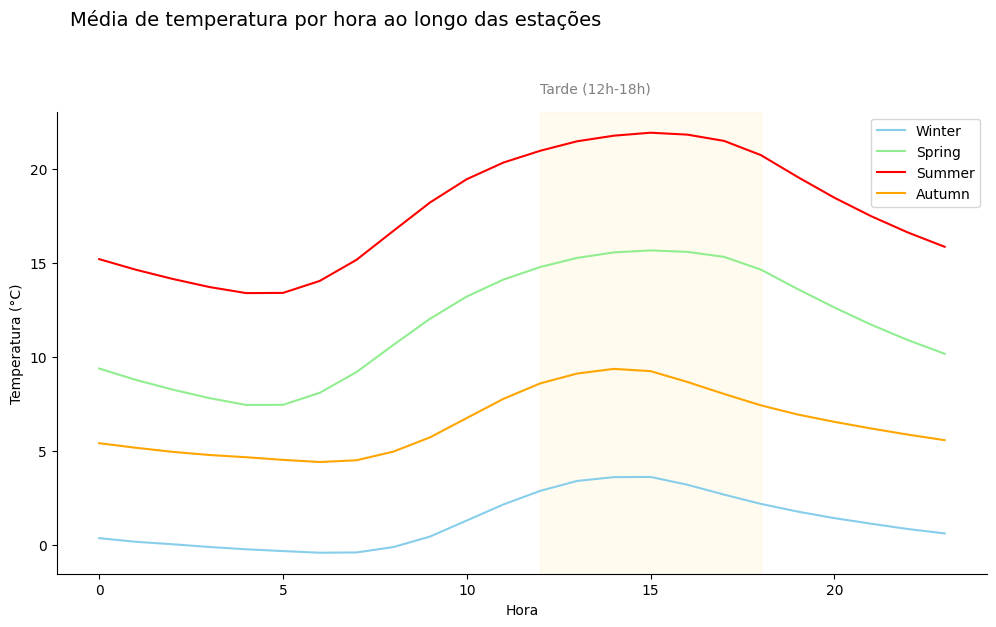

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

for season, color in colors.items():
    df.loc[df["season"] == season].groupby("hour")["T (degC)"].mean().plot(
        kind="line", color=color, ax=ax
    )

ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura (°C)")

# adicionar período da tarde
ax.axvspan(12, 18, alpha=0.3, color="#FFF2CD")
ax.text(12, 24, "Tarde (12h-18h)", fontsize=10, color="gray")

# remover eixo superior e direito
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# adicionar título
ax.text(
    0.3,
    1.2,
    "Média de temperatura por hora ao longo das estações",
    ha="center",
    va="center",
    transform=ax.transAxes,
    fontsize=14,
)

ax.legend(colors.keys())
plt.show()

A temperatura costuma ser mais baixa durante a madrugada e mais alta no período da tarde como esperado, sendo mais alta em torno das 15h e mais baixa perto das 5h para todas estações.

## 3. Análise estatísticas

### 3.1 Teste normalidade

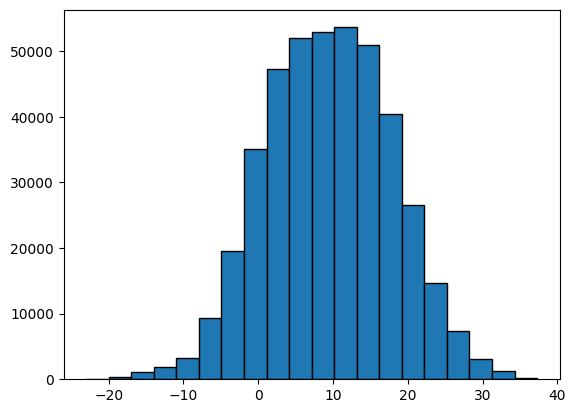

In [31]:
plt.hist(df["T (degC)"], edgecolor="black", bins=20)
plt.show()

Ao realizar o plot do histograma, a distribuição de temperatura, parece aproxidamente normal, para validar se a distribuição é gaussiana, usamos o teste de normalidade a seguir.

In [32]:
# Anderson-Darling Normality Test
from scipy.stats import anderson

result = anderson(df["T (degC)"])
print("stat=%.3f" % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print("Provavelmente guassina no nível %.1f%%" % (sl))
    else:
        print("Provavelmente não gaussiana no nível %.1f%%" % (sl))

stat=235.276
Provavelmente não gaussiana no nível 15.0%
Provavelmente não gaussiana no nível 10.0%
Provavelmente não gaussiana no nível 5.0%
Provavelmente não gaussiana no nível 2.5%
Provavelmente não gaussiana no nível 1.0%


### 3.2 Teste de correlação

/tmp/ipykernel_2673796/135587134.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method="spearman")


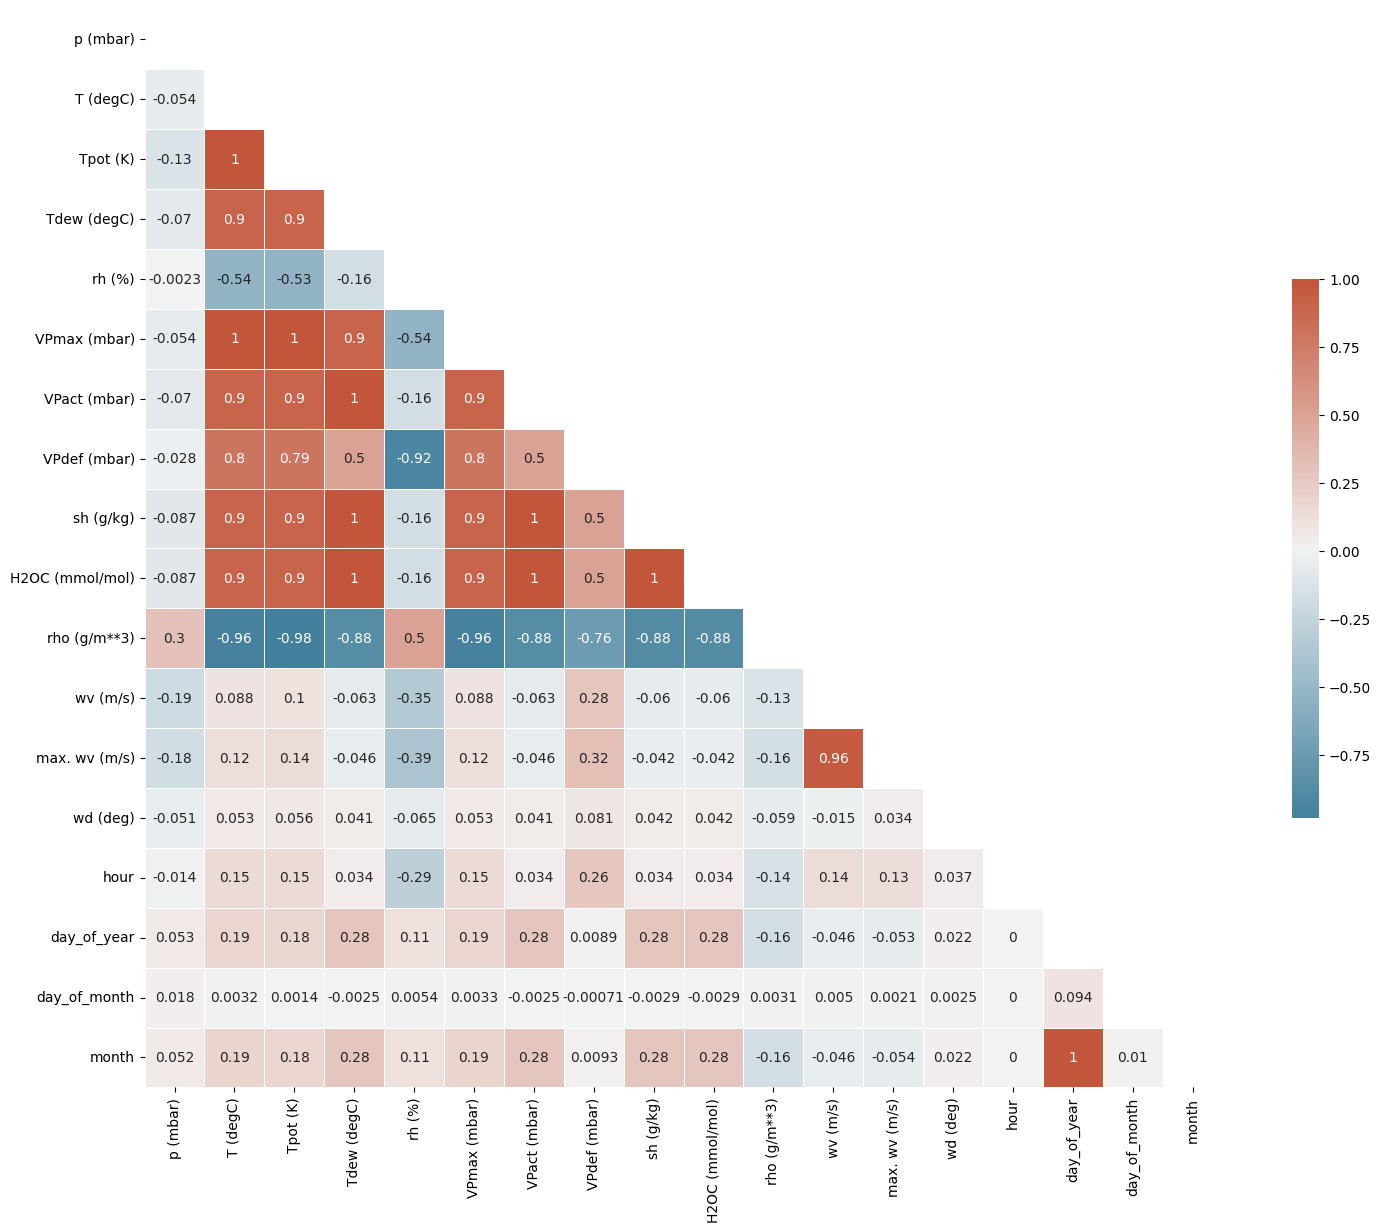

In [33]:
# Obtém a correlação entre as colunas numéricas de nosso conjunto
corr = df.corr(method="spearman")

# Gera uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define uma figura do matplotlib
f, ax = plt.subplots(figsize=(18, 14))

# Gera um colormap divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenha um heatmap com a máscara e a correta proporção
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.show()

Analisando o gráfico de correlação acima, vemos que a variável de temperatura em graus Celsius tem correlação perfeita com as variáveis `Tpot (K)` e `VPmax (mbar)`, correlação positiva forte com 5 variáveis, negativa forte com  `rho (g/m**3)` e negativa moderada com `rh (%)`. 

Nos gráficos de dispersão da seção anterior, vimos a tendência de crescimento e decrescimento da temperatura com algumas variáveis, com a análise de correlação, podemos confirmar essa tendência.